# **Mission_1 토익 점수 데이터 분석**


## <미션>

최종 차수 점수 변화(Score_diff_total)와 feature들간의 관계를 분석하기 위한 가설 검증 수행
* 전처리 단계에서 생성한 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.
* 개별 변수 및 개별 변수들 간의 관계에 대해 분석합니다.
* [도전 미션] 새로운 변수를 추가하여 데이터에 대한 탐색적 데이터 분석을 수행해봅시다.

## <환경설정>

### &nbsp;&nbsp; 1) 라이브러리 불러오기

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 아래 필요한 라이브러리, 함수를 추가하시오.

import scipy.stats as spst



### &nbsp;&nbsp; 2) 한글 폰트 설정하기

In [13]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

### &nbsp;&nbsp; 3) 데이터 불러오기
    * toeic_preprocessed_data.csv

In [14]:
file = 'toeic_preprocessed_data.csv'
base_data = pd.read_csv(file)

<br><br><hr>

## 1. 기본 분석


  - 데이터프레임의 크기를 확인
  - 데이터프레임의 컬럼명과 컬렴별 데이터 개수, 데이터 타입을 확인
  - 데이터프레임 전체에 대한 기초통계량 확인
  - 결측치(NaN) 확인
    * 결측치(NaN)가 존재한다면 적절하게 조치합니다.

#### &nbsp;&nbsp; 1-1) 데이터프레임 크기 확인

In [6]:
## shape 

base_data.shape

(502, 20)

#### &nbsp;&nbsp; 1-2) 컬럼명, 데이터 개수, 데이터 타입 확인

In [4]:
## info

base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                500 non-null    int64 
 1   Gender            500 non-null    object
 2   Birth_Year        500 non-null    int64 
 3   3rd_LC_Score      500 non-null    int64 
 4   3rd_RC_Score      500 non-null    int64 
 5   3rd_Total_Score   500 non-null    int64 
 6   학습목표              500 non-null    object
 7   학습방법              500 non-null    object
 8   강의 학습 교재 유형       500 non-null    object
 9   학습빈도              500 non-null    object
 10  기출문제 공부 횟수        500 non-null    int64 
 11  취약분야 인지 여부        500 non-null    object
 12  토익 모의테스트 횟수       500 non-null    int64 
 13  1st_LC_Score      500 non-null    int64 
 14  1st_RC_Score      500 non-null    int64 
 15  1st_Total_Score   500 non-null    int64 
 16  2nd_LC_Score      500 non-null    int64 
 17  2nd_RC_Score    

#### &nbsp;&nbsp; 1-3) 기초통계량 확인

In [9]:
## describe

base_data.describe()


,ID,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,250.587649,1992.948207,368.023904,369.318725,737.382470,5.093625,9.452191,313.697211,312.798805,626.496016,337.868526,338.045817,675.924303,61.458167
std,144.199862,8.236603,82.052339,81.659228,155.752174,2.781676,4.952137,85.483105,86.522443,148.318758,84.141542,83.817809,152.986694,39.684902
min,1.000000,1973.000000,141.000000,135.000000,280.000000,1.000000,1.000000,105.000000,84.000000,250.000000,120.000000,129.000000,260.000000,0.000000
25%,126.250000,1987.000000,295.000000,295.000000,591.250000,3.000000,5.000000,259.250000,250.000000,519.000000,279.000000,280.500000,558.750000,30.000000
50%,251.500000,1993.000000,372.000000,375.000000,760.000000,5.000000,8.000000,308.000000,311.500000,641.000000,332.500000,335.000000,690.500000,63.000000
75%,374.750000,2000.000000,434.000000,437.000000,860.000000,7.000000,13.000000,369.000000,377.750000,734.750000,395.000000,400.000000,790.000000,83.000000
max,500.000000,2007.000000,495.000000,495.000000,990.000000,10.000000,20.000000,495.000000,491.000000,970.000000,495.000000,495.000000,990.000000,281.000000


In [10]:
## .T 를 활용하여 행/열 변경하기

base_data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,502.0,NaN,NaN,NaN,250.587649,144.199862,1.0,126.25,251.5,374.75,500.0
Gender,502,2,M,251,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Birth_Year,502.0,NaN,NaN,NaN,1992.948207,8.236603,1973.0,1987.0,1993.0,2000.0,2007.0
3rd_LC_Score,502.0,NaN,NaN,NaN,368.023904,82.052339,141.0,295.0,372.0,434.0,495.0
3rd_RC_Score,502.0,NaN,NaN,NaN,369.318725,81.659228,135.0,295.0,375.0,437.0,495.0
3rd_Total_Score,502.0,NaN,NaN,NaN,737.38247,155.752174,280.0,591.25,760.0,860.0,990.0
학습목표,502,3,자기계발,331,NaN,NaN,NaN,NaN,NaN,NaN,NaN
학습방법,502,3,온라인강의,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
강의 학습 교재 유형,502,4,일반적인 영어 텍스트 기반 교재,137,NaN,NaN,NaN,NaN,NaN,NaN,NaN
학습빈도,502,4,주3-4회,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### &nbsp;&nbsp; 1-4) 결측치(N/A) 개수 확인

In [13]:
## 결측치 포함 여부 : isna

base_data.isna().sum()

ID                  0
Gender              0
Birth_Year          0
3rd_LC_Score        0
3rd_RC_Score        0
3rd_Total_Score     0
학습목표                0
학습방법                0
강의 학습 교재 유형         0
학습빈도                0
기출문제 공부 횟수          0
취약분야 인지 여부          0
토익 모의테스트 횟수         0
1st_LC_Score        0
1st_RC_Score        0
1st_Total_Score     0
2nd_LC_Score        0
2nd_RC_Score        0
2nd_Total_Score     0
Score_diff_total    0
dtype: int64

<br><br><hr>

## 2. 단변량 분석


- 주요 변수들의 분포를 살펴보며 비즈니스를 파악합시다.
- 단일 변수로 분석
    * 숫자형 변수 : 기초통계량, 히스토그램, kdeplot, 박스플롯
    * 범주형 변수 : 범주별 빈도수, 바 플롯


#### &nbsp;&nbsp; 2-1) 최종 차수 점수 변화(Score_diff_total)

,count,mean,std,min,25%,50%,75%,max
Score_diff_total,502.0,61.458167,39.684902,0.0,30.0,63.0,83.0,281.0


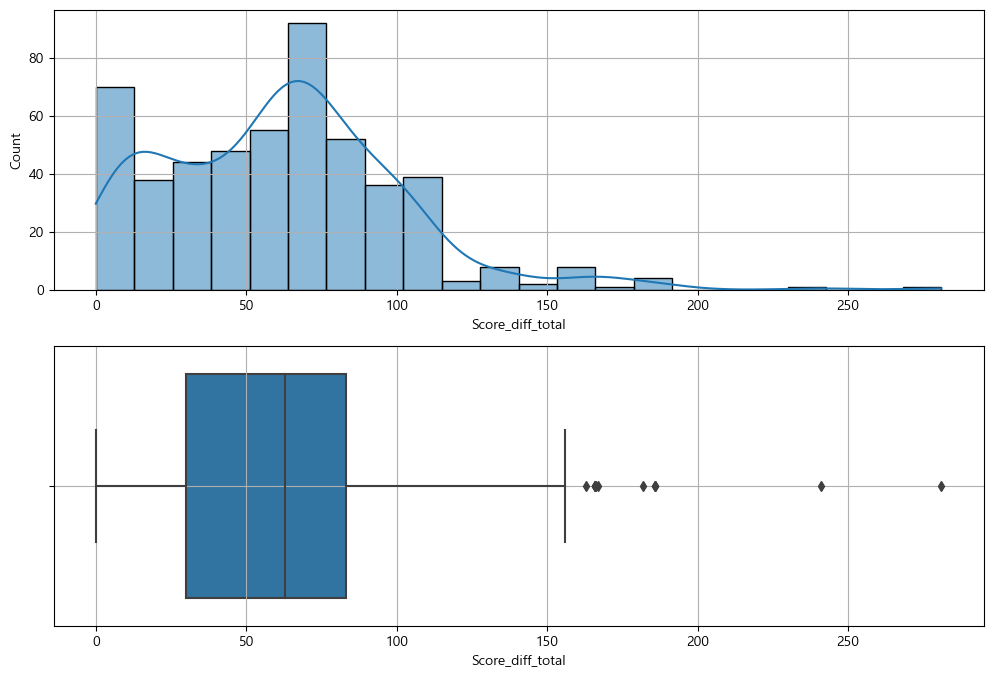

In [15]:
## 'Score_diff_total' 변수의 기초통계량 확인
display(base_data[['Score_diff_total']].describe().T)

plt.figure(figsize = (12,8))

## 'Score_diff_total' 변수의 histplot그리기

plt.subplot(2,1,1)
sns.histplot(x = 'Score_diff_total', data = base_data, kde = True)
plt.grid()

## 'Score_diff_total' 변수의 boxplot 그리기

plt.subplot(2,1,2)
sns.boxplot(x = 'Score_diff_total', data = base_data)
plt.grid()

plt.show()

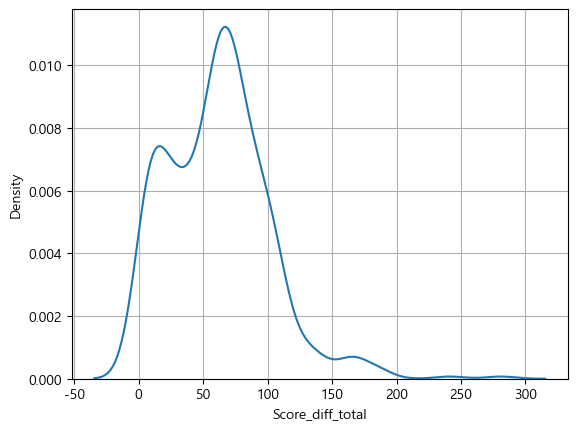

In [15]:
## 'Score_diff_total' 변수의 kdeplot 그리기

sns.kdeplot(x = 'Score_diff_total', data = base_data)
plt.grid()

plt.show()

#### &nbsp;&nbsp; 2-2) 범주형 변수
   * 분석 방법 : 범주별 빈도수, countplot
   * 대상 변수 : Gender, 학습목표, 학습방법, 강의 학습 교재 유형, 학습빈도, 취약분야 인지 여부

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-1) 'Gender'

M    251
F    251
Name: Gender, dtype: int64
M    0.5
F    0.5
Name: Gender, dtype: float64


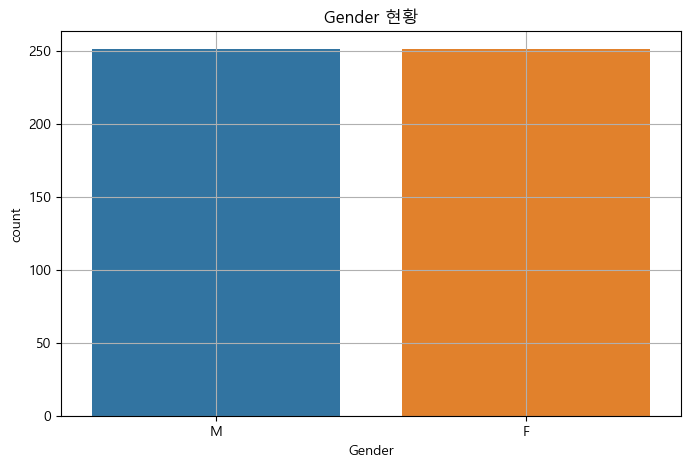

In [17]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()

print(base_data['Gender'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
print(base_data['Gender'].value_counts()/base_data.shape[0])

## 그래프 분석하기 : countplot()

plt.figure(figsize=(8, 5))
sns.countplot(x = 'Gender', data = base_data)
plt.title('Gender 현황')
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-2) 학습목표

자기계발    331
승진      155
취업       16
Name: 학습목표, dtype: int64
자기계발    0.659363
승진      0.308765
취업      0.031873
Name: 학습목표, dtype: float64


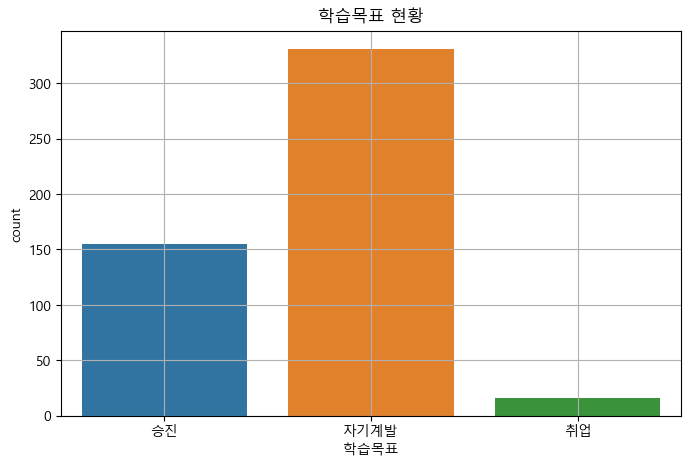

In [19]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
print(base_data['학습목표'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
print(base_data['학습목표'].value_counts()/base_data.shape[0])

## 그래프 분석하기 : countplot()

plt.figure(figsize=(8, 5))
sns.countplot(x = '학습목표', data = base_data)
plt.title('학습목표 현황')
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-3) 학습방법

온라인강의     209
오프라인강의    162
참고서       131
Name: 학습방법, dtype: int64
온라인강의     0.416335
오프라인강의    0.322709
참고서       0.260956
Name: 학습방법, dtype: float64


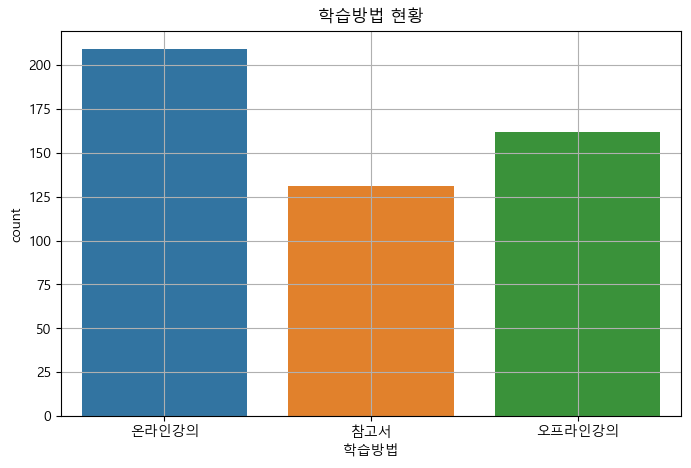

In [21]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
print(base_data['학습방법'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
print(base_data['학습방법'].value_counts()/base_data.shape[0])

## 그래프 분석하기 : countplot()

plt.figure(figsize=(8, 5))
sns.countplot(x = '학습방법', data = base_data)
plt.title('학습방법 현황')
plt.grid()
plt.show()


##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-4) 강의 학습 교재 유형 

일반적인 영어 텍스트 기반 교재        137
영상 교재                    129
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64
일반적인 영어 텍스트 기반 교재        0.272908
영상 교재                    0.256972
뉴스/이슈 기반 교재              0.243028
비즈니스 시뮬레이션(Role Play)    0.227092
Name: 강의 학습 교재 유형, dtype: float64


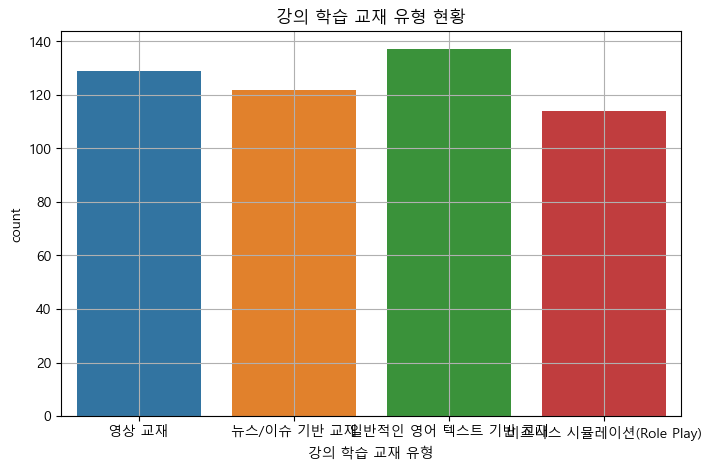

In [23]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()

print(base_data['강의 학습 교재 유형'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
print(base_data['강의 학습 교재 유형'].value_counts()/base_data.shape[0])

## 그래프 분석하기 : countplot()

plt.figure(figsize=(8, 5))
sns.countplot(x = '강의 학습 교재 유형', data = base_data)
plt.title('강의 학습 교재 유형 현황')
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-5) 학습빈도 

주3-4회       151
주5-6회       128
주1-2회       125
매일(주 7회)     98
Name: 학습빈도, dtype: int64
주3-4회       0.300797
주5-6회       0.254980
주1-2회       0.249004
매일(주 7회)    0.195219
Name: 학습빈도, dtype: float64


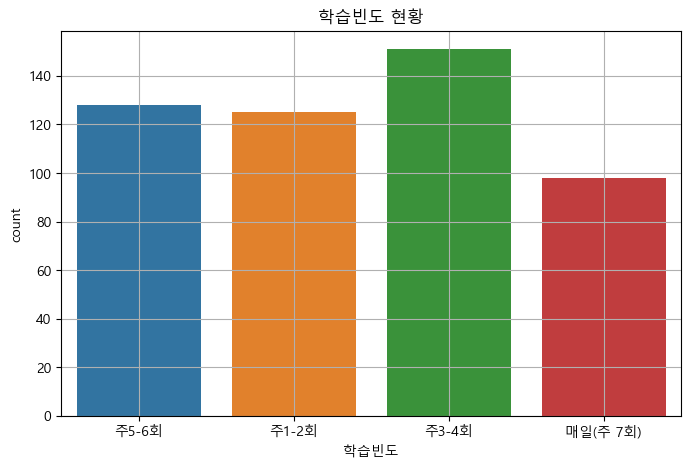

In [25]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()

print(base_data['학습빈도'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
print(base_data['학습빈도'].value_counts()/base_data.shape[0])

## 그래프 분석하기 : countplot()

plt.figure(figsize=(8, 5))
sns.countplot(x = '학습빈도', data = base_data)
plt.title('학습빈도 현황')
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-2-6) 취약분야 인지 여부

알고 있음       463
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64
알고 있음       0.922311
알고 있지 않음    0.077689
Name: 취약분야 인지 여부, dtype: float64


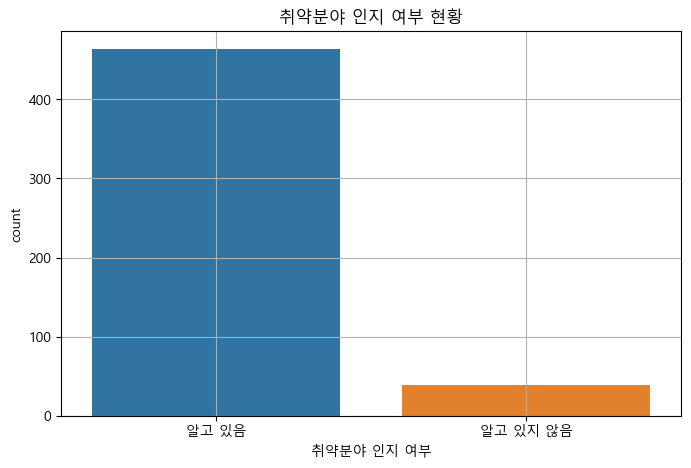

In [27]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()

print(base_data['취약분야 인지 여부'].value_counts())
## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
print(base_data['취약분야 인지 여부'].value_counts()/base_data.shape[0])

## 그래프 분석하기 : countplot()
plt.figure(figsize=(8, 5))
sns.countplot(x = '취약분야 인지 여부', data = base_data)
plt.title('취약분야 인지 여부 현황')
plt.grid()
plt.show()

#### &nbsp;&nbsp; 2-3) 수치형 변수
   * 분석 방법 : 기초 통계, 히스토그램, boxplot
   * 대상 변수 : 'Birth_Year', '기출문제 공부 횟수','토익 모의테스트 횟수',  '1st_Total_Score', '2st_Total_Score'
             

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-1) Bitrh_Year

,count,mean,std,min,25%,50%,75%,max
Birth_Year,502.0,1992.948207,8.236603,1973.0,1987.0,1993.0,2000.0,2007.0


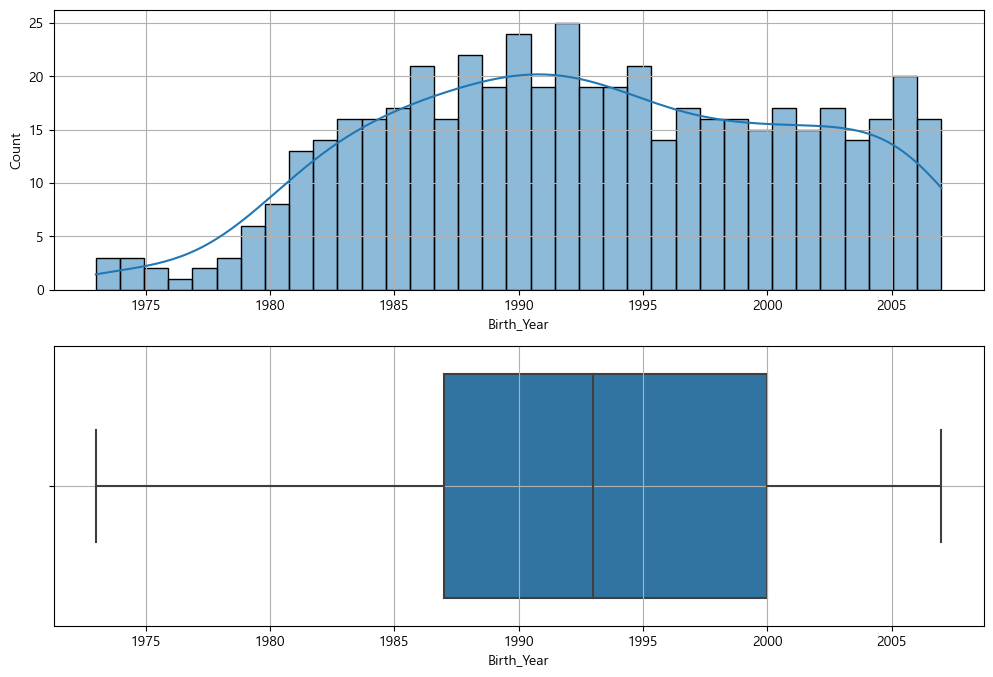

In [31]:
## 수치형 변수의 기초 통계량 확인 : describe

display(base_data[['Birth_Year']].describe().T)

## 그래프 분석 : histplot, boxplot

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

## 히스토그램을 이용한 데이터 분포 확인
sns.histplot(x = 'Birth_Year', data = base_data, kde = True, bins = 35)
plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
sns.boxplot(x = 'Birth_Year', data = base_data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-2) 기출문제 공부 횟수

,count,mean,std,min,25%,50%,75%,max
기출문제 공부 횟수,502.0,5.093625,2.781676,1.0,3.0,5.0,7.0,10.0


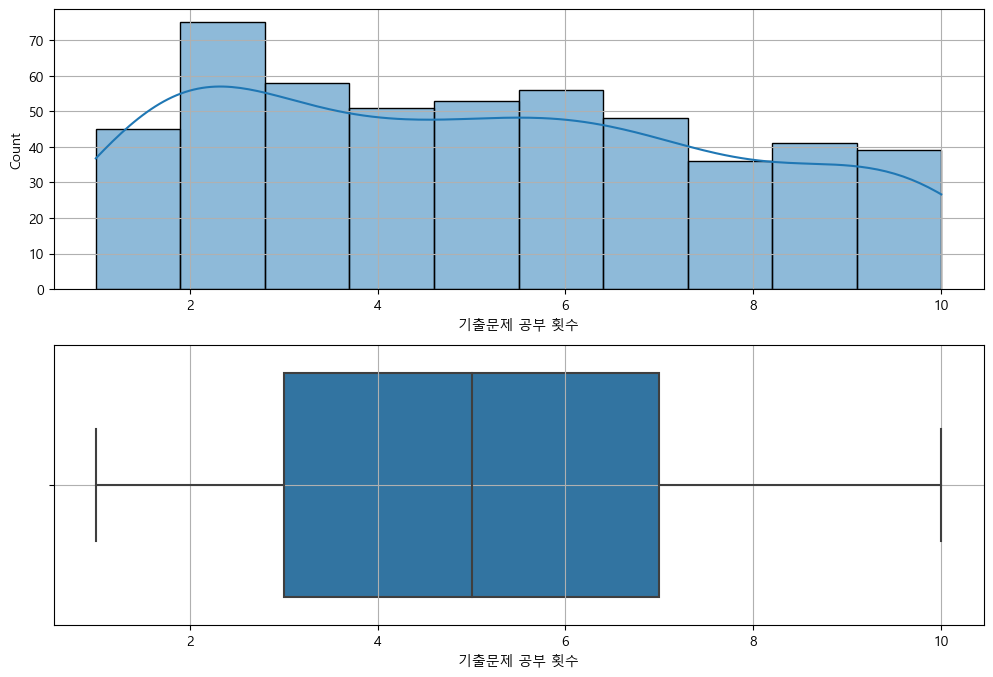

In [33]:
## 수치형 변수의 기초 통계량 확인 : describe

display(base_data[['기출문제 공부 횟수']].describe().T)

## 그래프 분석 : histplot, boxplot

plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

## 히스토그램을 이용한 데이터 분포 확인

sns.histplot(x = '기출문제 공부 횟수', data = base_data, kde = True)
plt.grid()

plt.subplot(2,1,2)

## boxplot 이용한 데이터 분포 확인
sns.boxplot(x = '기출문제 공부 횟수', data = base_data)
plt.grid()

plt.show()



##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-3) 토익 모의테스트 횟수

,count,mean,std,min,25%,50%,75%,max
토익 모의테스트 횟수,502.0,9.452191,4.952137,1.0,5.0,8.0,13.0,20.0


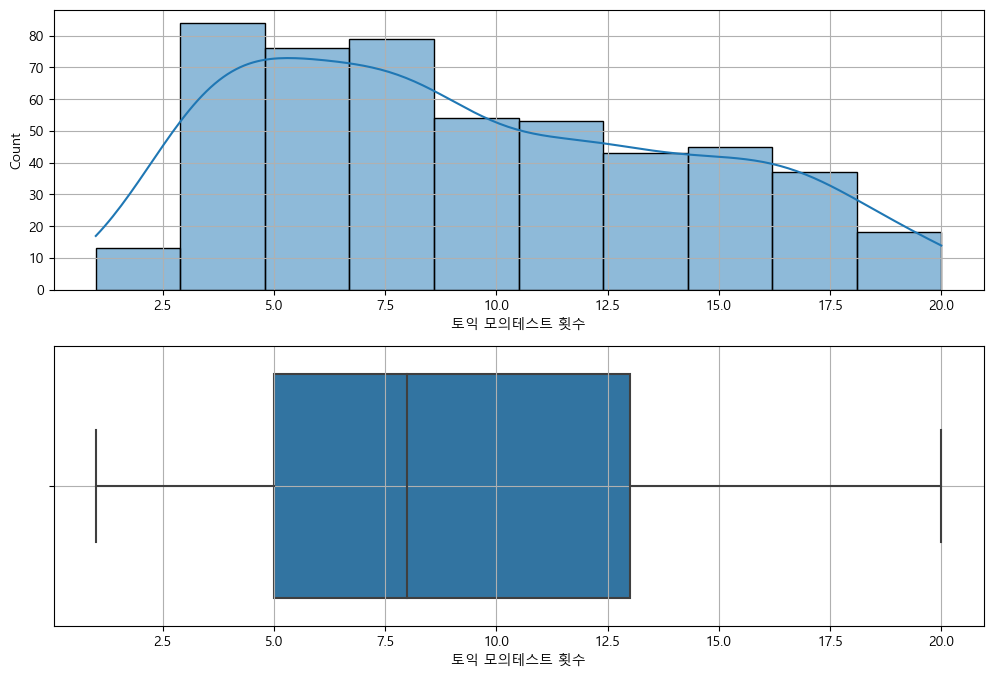

In [41]:
## 수치형 변수의 기초 통계량 확인 : describe
display(base_data[['토익 모의테스트 횟수']].describe().T)

## 그래프 분석 : histplot, boxplot
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
## 히스토그램을 이용한 데이터 분포 확인
sns.histplot(x = '토익 모의테스트 횟수', data = base_data, kde = True)
plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
sns.boxplot(x = '토익 모의테스트 횟수', data = base_data)
plt.grid()

plt.show()



##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-4) 1st_Total_Score

,count,mean,std,min,25%,50%,75%,max
1st_Total_Score,502.0,626.496016,148.318758,250.0,519.0,641.0,734.75,970.0


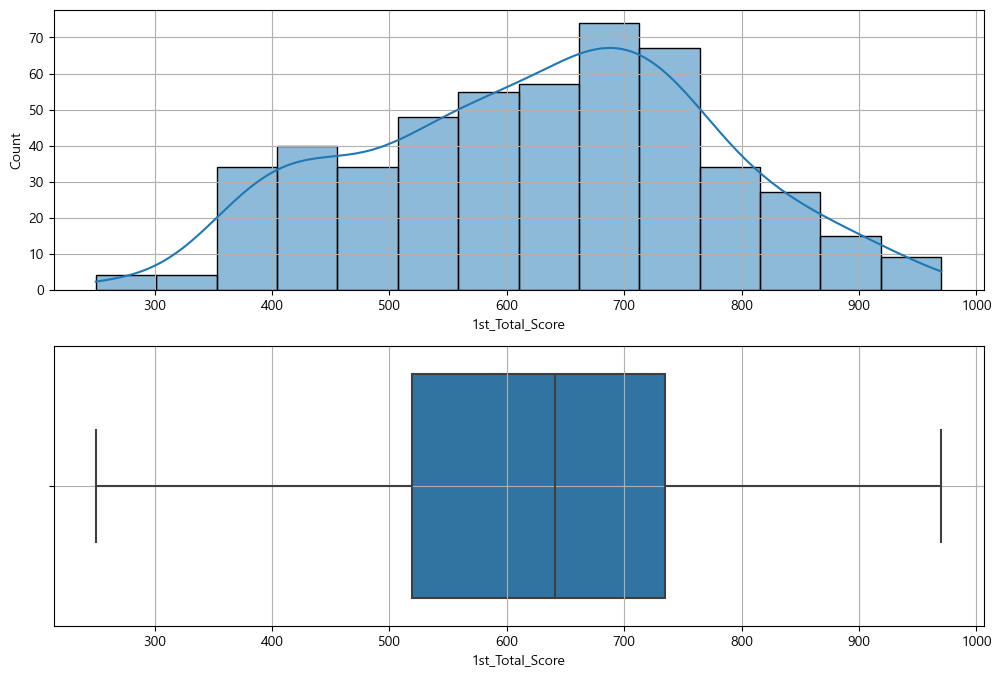

In [43]:
## 수치형 변수의 기초 통계량 확인 : describe
display(base_data[['1st_Total_Score']].describe().T)

## 그래프 분석 : histplot, boxplot
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)

## 히스토그램을 이용한 데이터 분포 확인
sns.histplot(x = '1st_Total_Score', data = base_data, kde = True)
plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
sns.boxplot(x = '1st_Total_Score', data = base_data)
plt.grid()

plt.show()




##### &nbsp; &nbsp; &nbsp; &nbsp; 2-3-5) 2nd_Total_Score

,count,mean,std,min,25%,50%,75%,max
2nd_Total_Score,502.0,675.924303,152.986694,260.0,558.75,690.5,790.0,990.0


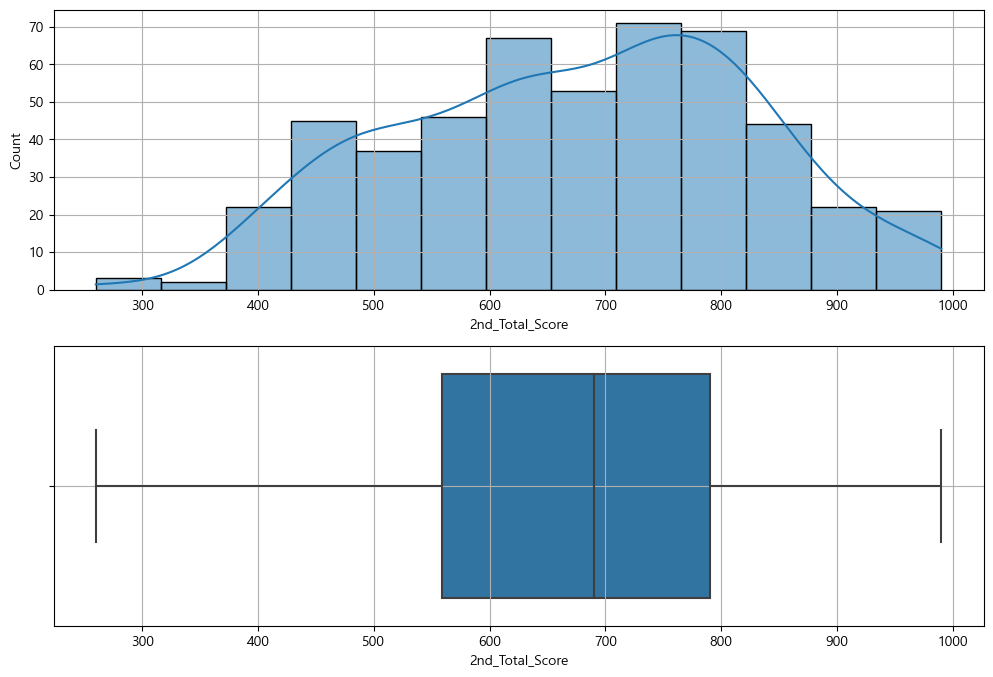

In [45]:
## 수치형 변수의 기초 통계량 확인 : describe
display(base_data[['2nd_Total_Score']].describe().T)

## 그래프 분석 : histplot, boxplot
plt.figure(figsize = (12,8))

plt.subplot(2,1,1)
## 히스토그램을 이용한 데이터 분포 확인
sns.histplot(x = '2nd_Total_Score', data = base_data, kde = True)
plt.grid()

plt.subplot(2,1,2)
## boxplot 이용한 데이터 분포 확인
sns.boxplot(x = '2nd_Total_Score', data = base_data)
plt.grid()

plt.show()


## [정리] 단변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

<br><br><hr><br><br>

## 3. 이변량 분석

- 수치형 feature --> 수치형 target
    - 전체 변수들 간의 상관관계 구하기
        * 범주형 변수를 제외한 데이터셋을 이용하여
        * .corr() + sns.heatmap() 으로 전체 상관계수를 시각화
    - 상관계수 상위 몇개에 대해서 feature와 target에 대해 
        * 상관분석을 통해 상관계수가 유의미함을 분석
        * 산점도를 통해 상관관계를 시각화하여 분석
- 범주형 feature --> 수치형 target
    * 범주간에 target의 평균의 차이가 있는지 분석
    * 범주별 barplot으로 평균의 차이를 시각화하여 분석

#### &nbsp;&nbsp; 3-1) 수치형 feature --> 수치형 target


##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-1) 전체 수치형 변수들 간의 상관관계 분석

* 수치형 변수 리스트 만들기

In [46]:
# 수치형 변수 리스트 정의

col_num = ['Birth_Year','3rd_LC_Score','3rd_RC_Score','3rd_Total_Score', '기출문제 공부 횟수','토익 모의테스트 횟수', '1st_LC_Score', '1st_RC_Score', '1st_Total_Score',
            '2nd_LC_Score', '2nd_RC_Score', '2nd_Total_Score', 'Score_diff_total']

In [47]:
## 수치형 변수들의 데이터 확인

base_data[col_num]

,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
0,1973,345,336,681,7,10,181,173,354,227,213,440,241
1,1982,380,368,748,4,14,330,290,620,354,339,693,55
2,1995,416,382,798,4,4,367,309,676,396,365,761,37
3,1987,495,397,892,9,8,470,285,755,495,341,836,56
4,1994,398,437,835,6,4,273,372,645,314,426,740,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2006,364,336,700,10,13,347,315,662,349,321,670,30
498,1988,187,252,439,9,17,112,250,362,120,251,371,68
499,2006,255,167,422,2,4,252,150,402,254,158,412,10
500,1990,422,370,792,4,7,371,324,695,378,326,704,88


* 숫자형 데이터의 상호 상관관계

In [48]:
## 데이터 프레임의 상관계수 도출하기 : corr

base_data[col_num].corr()

,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,기출문제 공부 횟수,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total
Birth_Year,1.000000,0.031630,0.023095,0.028742,0.000038,-0.011169,0.062821,0.050011,0.065381,0.055377,0.057310,0.061848,-0.125622
3rd_LC_Score,0.031630,1.000000,0.808962,0.951340,0.044004,0.011183,0.892755,0.639630,0.887668,0.951089,0.723574,0.919622,0.188571
3rd_RC_Score,0.023095,0.808962,1.000000,0.950712,0.032856,0.010823,0.649208,0.892595,0.894869,0.727052,0.948766,0.919743,0.185635
3rd_Total_Score,0.028742,0.951340,0.950712,1.000000,0.040676,0.011542,0.811217,0.805276,0.937304,0.882711,0.878910,0.967113,0.196465
기출문제 공부 횟수,0.000038,0.044004,0.032856,0.040676,1.000000,0.823420,0.001311,-0.014393,-0.007641,-0.010104,-0.015942,-0.014223,0.214471
토익 모의테스트 횟수,-0.011169,0.011183,0.010823,0.011542,0.823420,1.000000,-0.018319,-0.037218,-0.032270,-0.030725,-0.027104,-0.031754,0.167714
1st_LC_Score,0.062821,0.892755,0.649208,0.811217,0.001311,-0.018319,1.000000,0.487071,0.860483,0.951512,0.566726,0.833955,-0.031125
1st_RC_Score,0.050011,0.639630,0.892595,0.805276,-0.014393,-0.037218,0.487071,1.000000,0.864077,0.565115,0.956990,0.835206,-0.059264
1st_Total_Score,0.065381,0.887668,0.894869,0.937304,-0.007641,-0.032270,0.860483,0.864077,1.000000,0.878063,0.884896,0.967869,-0.052511
2nd_LC_Score,0.055377,0.951089,0.727052,0.882711,-0.010104,-0.030725,0.951512,0.565115,0.878063,1.000000,0.658952,0.911139,-0.048078


* 상관계수 시각화 

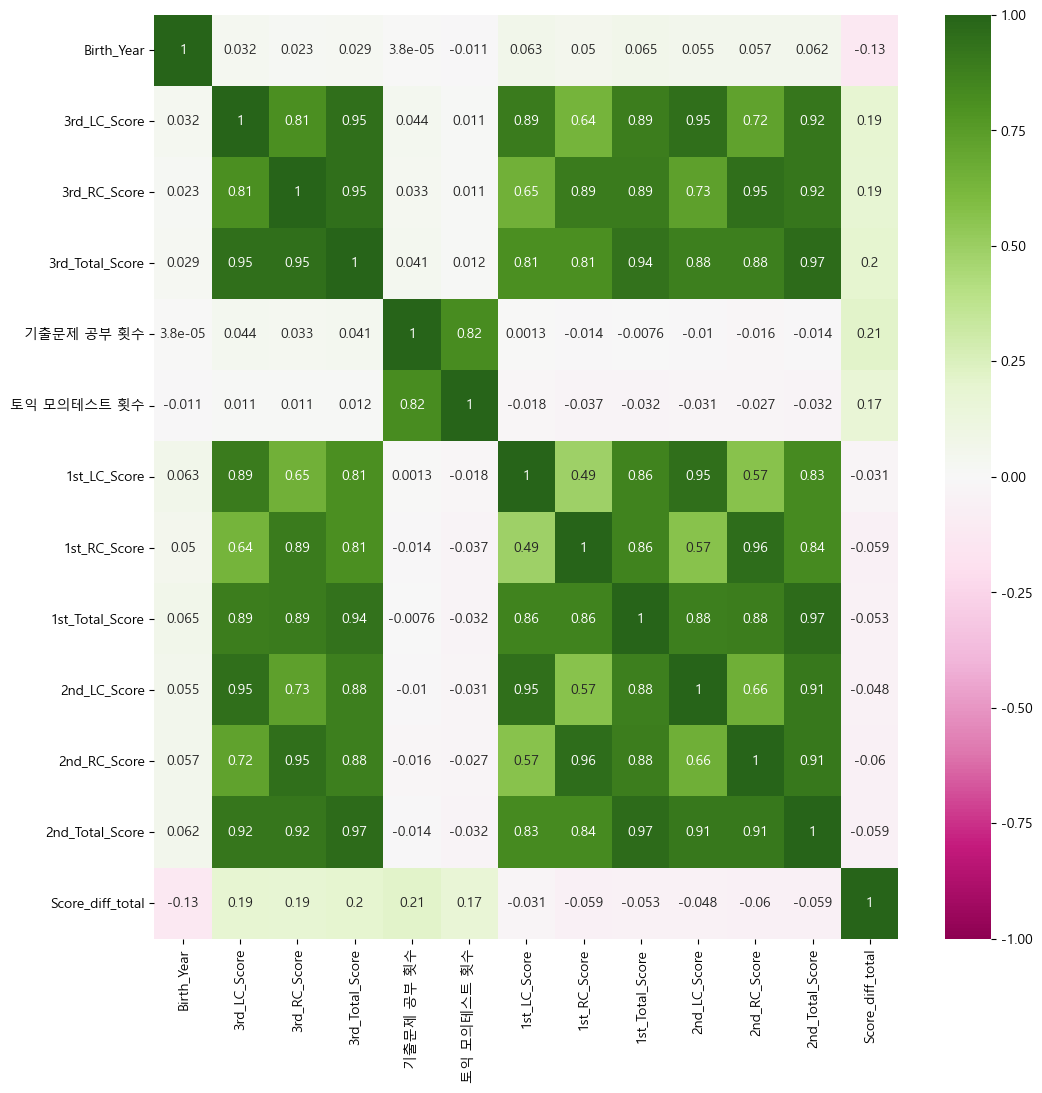

In [49]:
## 상관계수값을 heatmap을 이용하여 시각화 : heatmap

plt.figure(figsize = (12,12))
sns.heatmap(base_data[col_num].corr(),cmap="PiYG", annot=True,  vmin=-1, vmax=1)
plt.show()

### target과 상관계수 상위 3개 살펴보기

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-2) 기출문제 공부 횟수

In [31]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

In [52]:
## 상관분석 (pearsonr)

spst.pearsonr(base_data['기출문제 공부 횟수'], base_data['Score_diff_total'])

PearsonRResult(statistic=0.21447107219198502, pvalue=1.2354289161482366e-06)

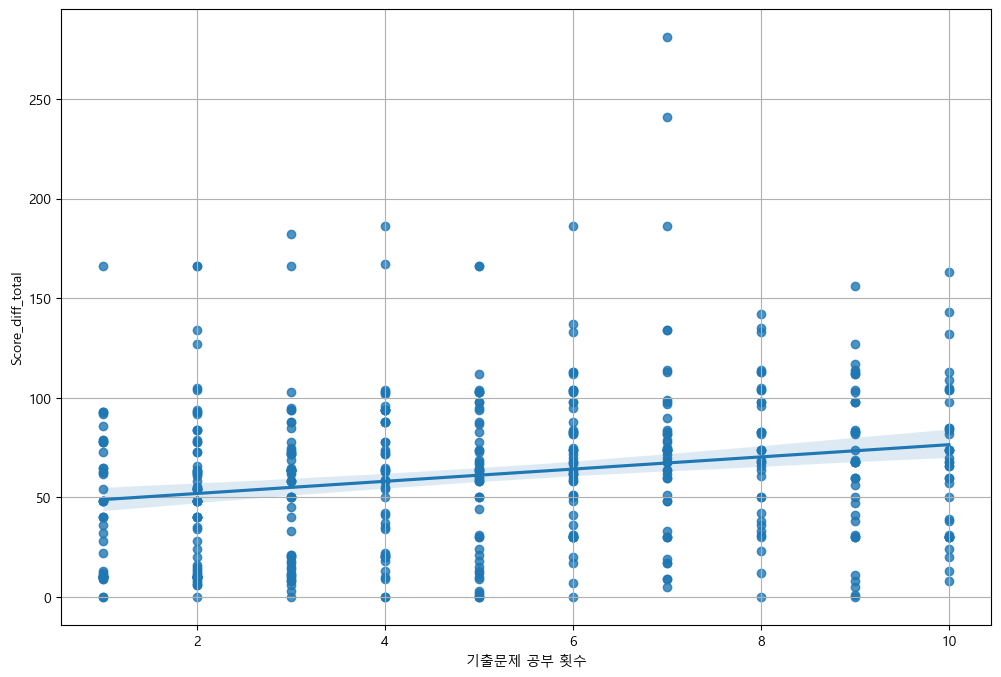

In [53]:
## regplot으로 시각화
plt.figure(figsize = (12,8))
sns.regplot(x = '기출문제 공부 횟수', y= 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-3) 토익 모의테스트 횟수

In [34]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

In [55]:
## 상관분석 (pearsonr)

spst.pearsonr(base_data['토익 모의테스트 횟수'], base_data['Score_diff_total'])

PearsonRResult(statistic=0.16771434559953421, pvalue=0.00015994068624749757)

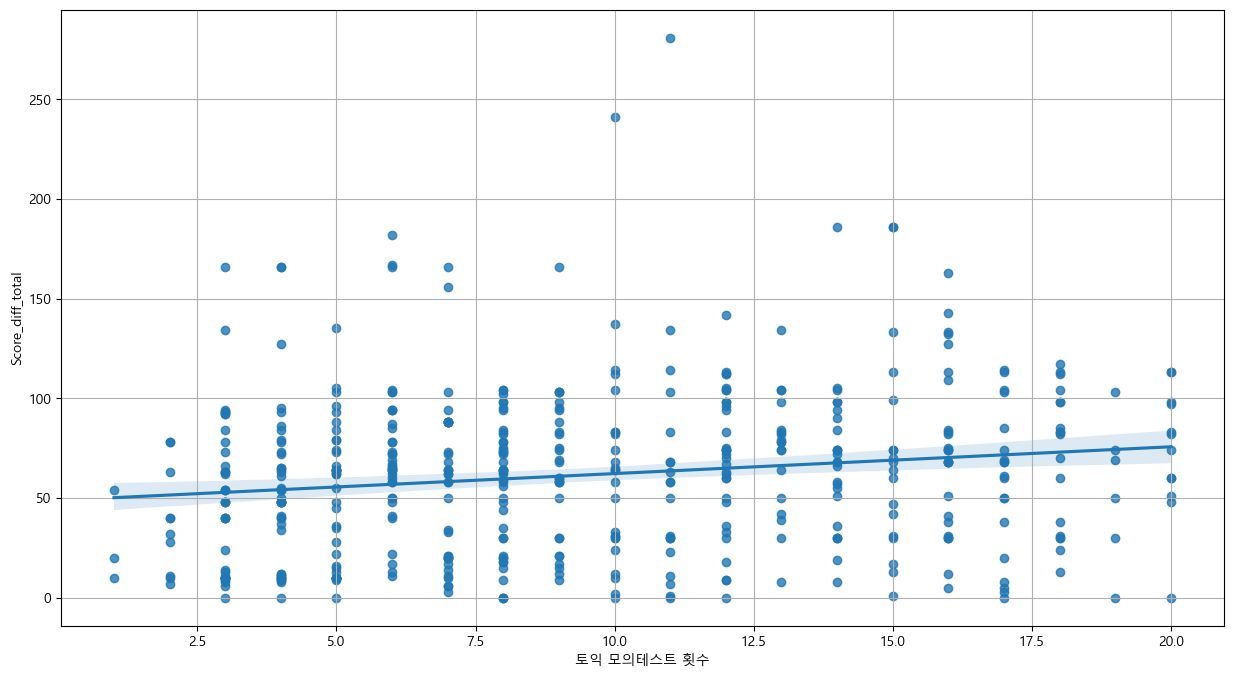

In [36]:
## regplot으로 시각화

plt.figure(figsize = (15,8))
sns.regplot(x = '토익 모의테스트 횟수', y= 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-1-4) 2차 종합점수

In [37]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

In [57]:
## 상관분석 (pearsonr)

spst.pearsonr(base_data['2nd_Total_Score'], base_data['Score_diff_total'])

PearsonRResult(statistic=-0.0593847047237045, pvalue=0.18404892134827236)

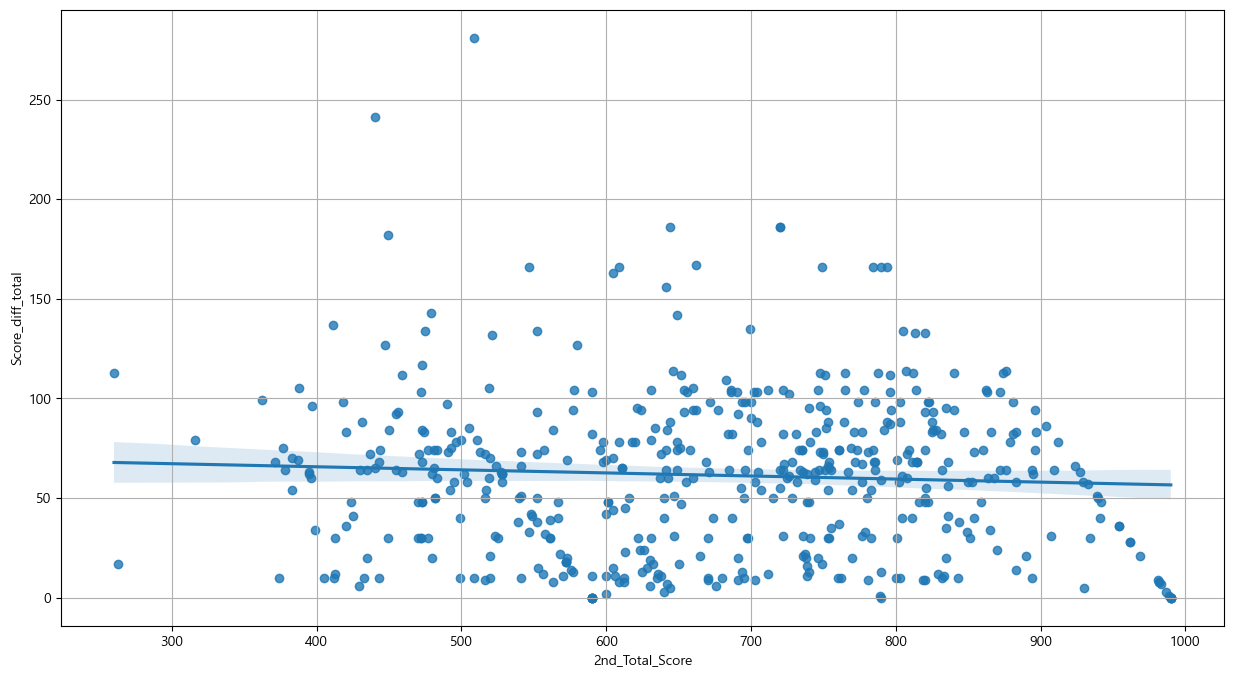

In [58]:

## regplot으로 시각화
plt.figure(figsize = (15,8))
sns.regplot(x = '2nd_Total_Score', y= 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

#### &nbsp;&nbsp; 3-2) 범주형 feature -> 수치형 target



In [40]:
## 범주형 feature

## 'Gender', '학습목표', '학습방법', '강의 학습 교재 유형', '학습빈도', '취약분야 인지 여부', 'age_group', 

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-1) Gender 

In [41]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

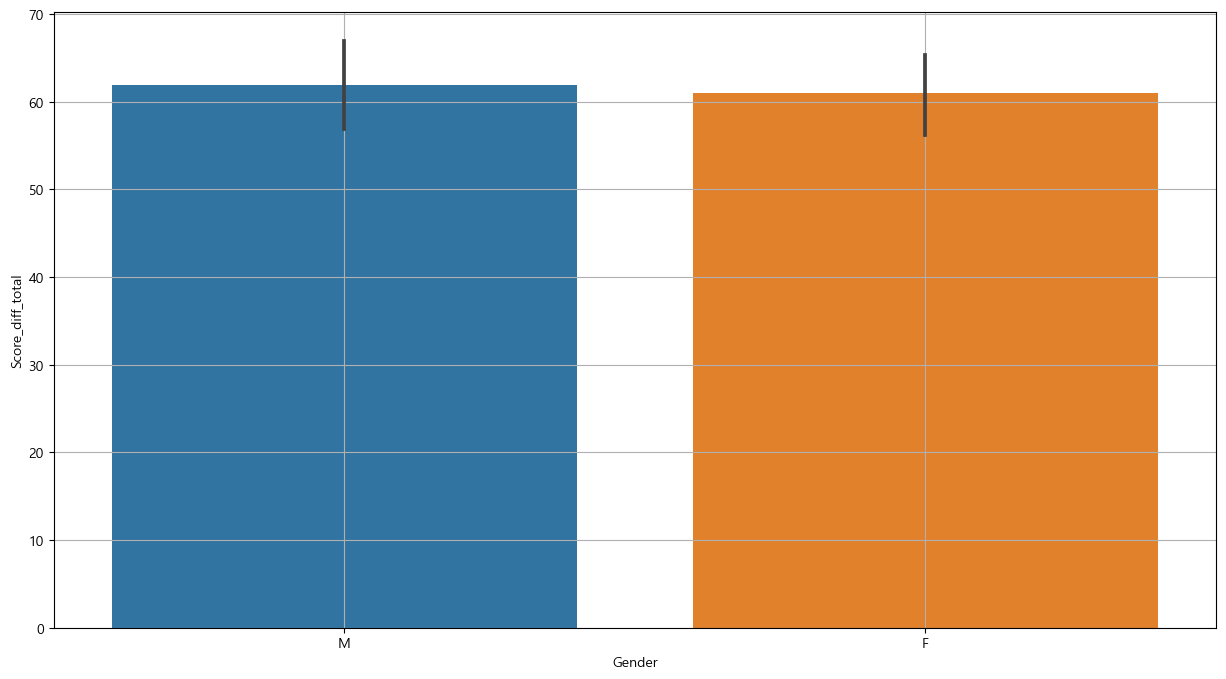

In [42]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
sns.barplot(x='Gender', y='Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [43]:
## 범주 데이터 확인 : value_counts()
base_data['Gender'].value_counts()

M    251
F    251
Name: Gender, dtype: int64

In [44]:
## 평균 분석 : ttest_ind

t_male = base_data.loc[base_data['Gender']=='M', 'Score_diff_total']
t_female = base_data.loc[base_data['Gender']=='F', 'Score_diff_total']

spst.ttest_ind(t_male, t_female)

Ttest_indResult(statistic=0.24269917356962678, pvalue=0.8083379722592037)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-2) 학습목표

In [45]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

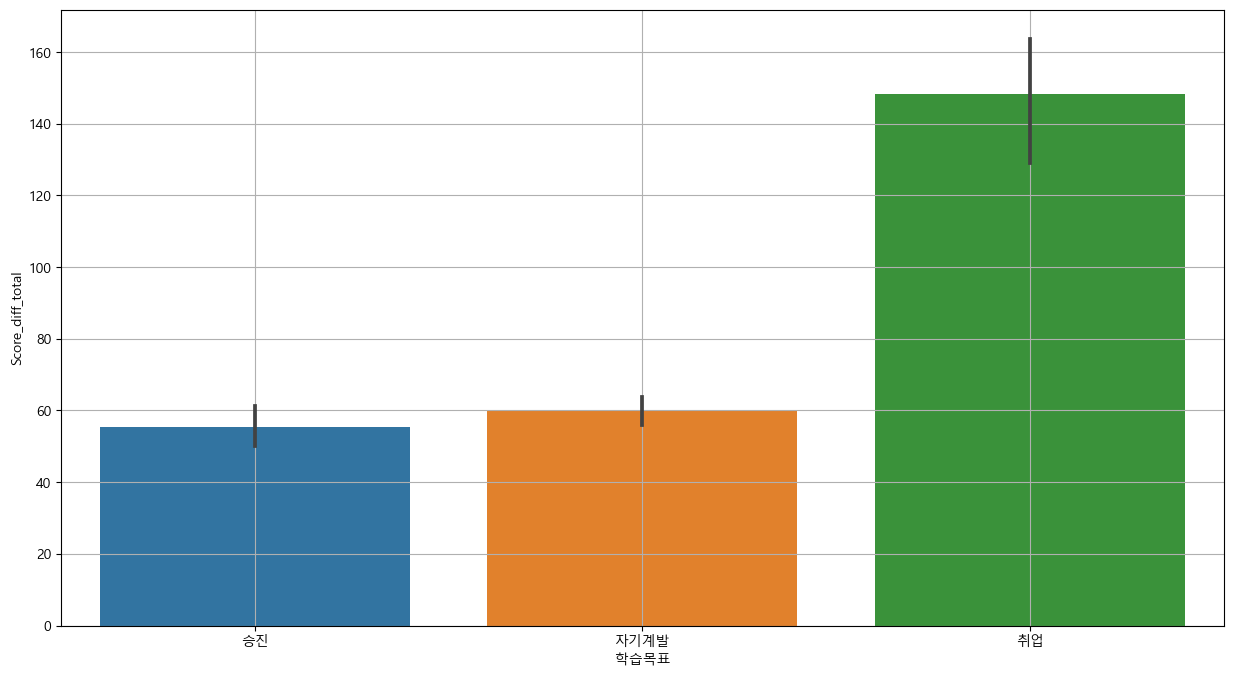

In [46]:
# 그래프 분석 : barplot

plt.figure(figsize = (15,8))
sns.barplot(x='학습목표', y='Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [62]:
## 범주 데이터 확인 : value_counts()
base_data['학습목표'].value_counts()

자기계발    331
승진      155
취업       16
Name: 학습목표, dtype: int64

In [60]:
## 분산 분석 : f_oneway

anova_1 = base_data.loc[base_data['학습목표']=='승진', 'Score_diff_total']
anova_2 = base_data.loc[base_data['학습목표']=='자기계발', 'Score_diff_total']
anova_3 = base_data.loc[base_data['학습목표']=='취업', 'Score_diff_total']

spst.f_oneway(anova_1, anova_2, anova_3)

F_onewayResult(statistic=47.82617265743061, pvalue=9.941082545089541e-20)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-3) 학습방법 

In [49]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

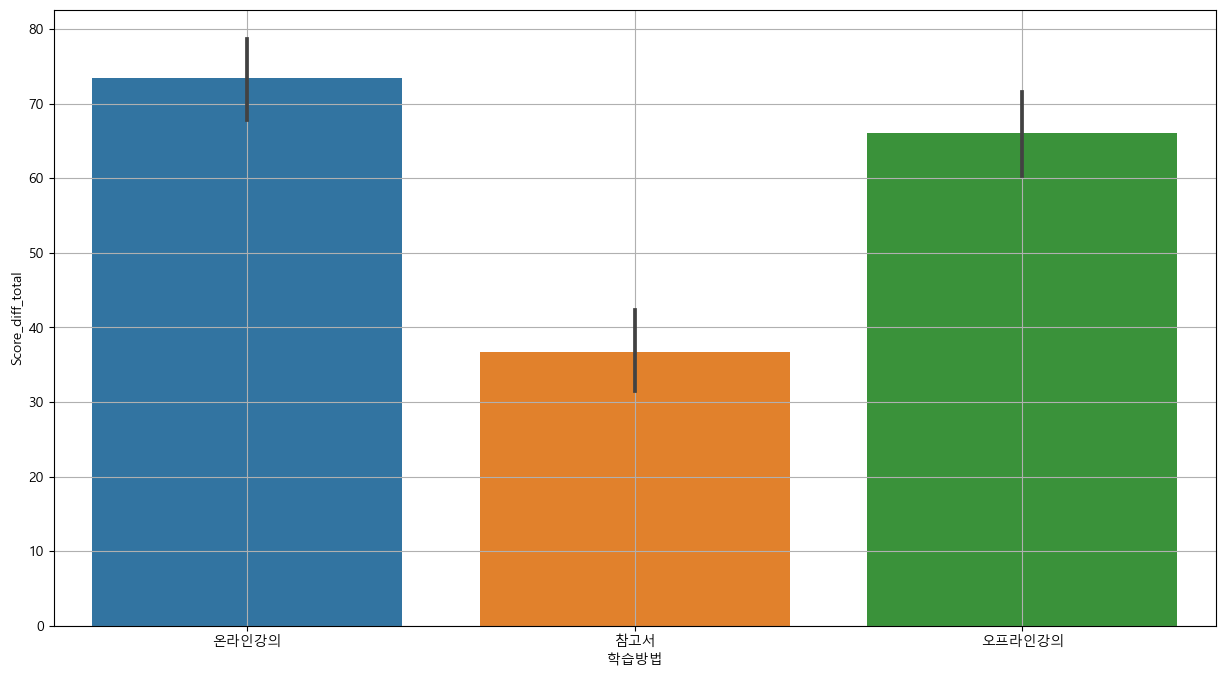

In [50]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
sns.barplot(x='학습방법', y='Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [64]:
## 범주 데이터 확인 : value_counts()
base_data['학습방법'].value_counts()

온라인강의     209
오프라인강의    162
참고서       131
Name: 학습방법, dtype: int64

In [66]:
## 분산 분석 : f_oneway

anova_1 = base_data.loc[base_data['학습방법']=='온라인강의', 'Score_diff_total']
anova_2 = base_data.loc[base_data['학습방법']=='오프라인강의', 'Score_diff_total']
anova_3 = base_data.loc[base_data['학습방법']=='참고서', 'Score_diff_total']

spst.f_oneway(anova_1, anova_2, anova_3)

F_onewayResult(statistic=41.90668500137541, pvalue=1.501323750268054e-17)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-4) 강의 학습 교재 유형

In [53]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

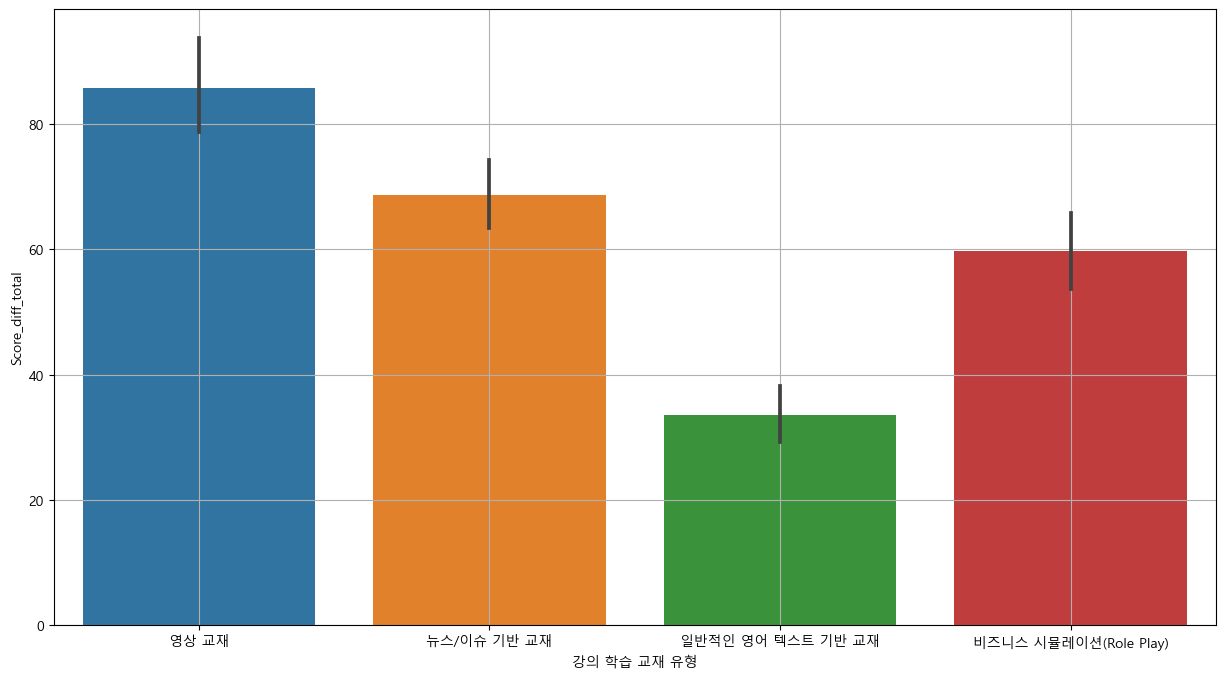

In [54]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
sns.barplot(x='강의 학습 교재 유형', y='Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [68]:
## 범주 데이터 확인 : value_counts()
base_data['강의 학습 교재 유형'].value_counts()

일반적인 영어 텍스트 기반 교재        137
영상 교재                    129
뉴스/이슈 기반 교재              122
비즈니스 시뮬레이션(Role Play)    114
Name: 강의 학습 교재 유형, dtype: int64

In [70]:
## 분산 분석 : f_oneway

anova_1 = base_data.loc[base_data['강의 학습 교재 유형']=='일반적인 영어 텍스트 기반 교재', 'Score_diff_total']
anova_2 = base_data.loc[base_data['강의 학습 교재 유형']=='영상 교재', 'Score_diff_total']
anova_3 = base_data.loc[base_data['강의 학습 교재 유형']=='뉴스/이슈 기반 교재', 'Score_diff_total']
anova_4 = base_data.loc[base_data['강의 학습 교재 유형']=='비즈니스 시뮬레이션(Role Play)', 'Score_diff_total']

spst.f_oneway(anova_1, anova_2, anova_3, anova_4)

F_onewayResult(statistic=52.80475676834428, pvalue=1.1967467199484406e-29)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-5) 학습빈도

In [57]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

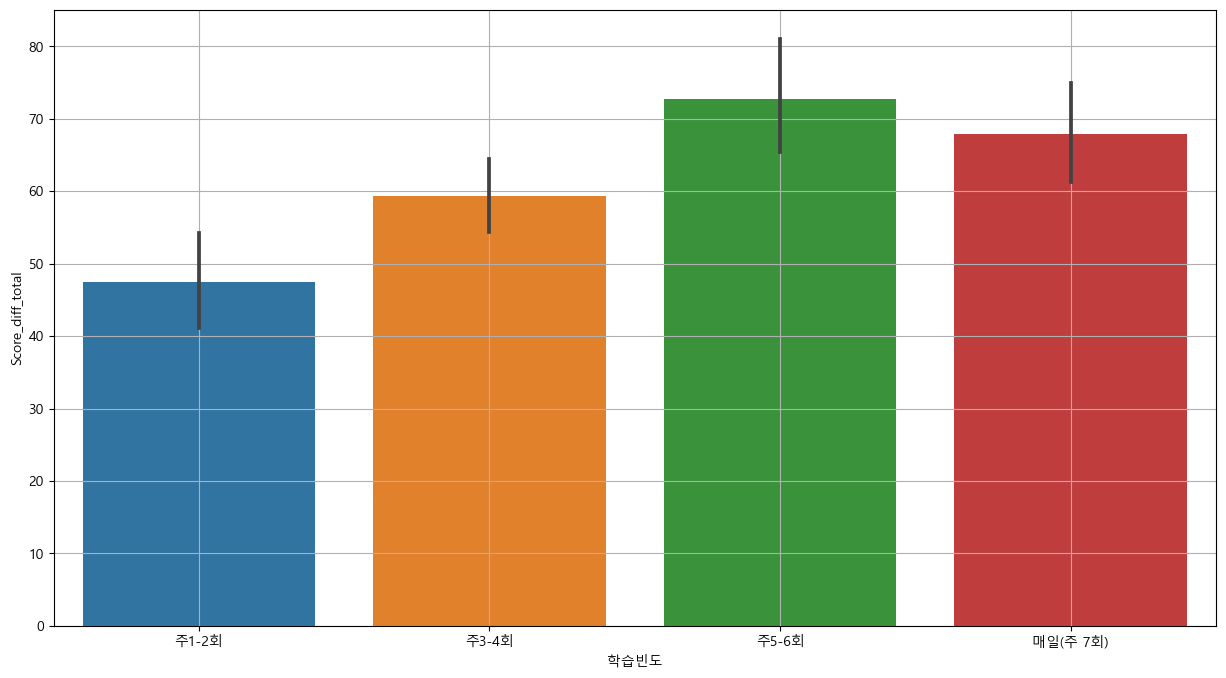

In [58]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
sns.barplot(x='학습빈도', y='Score_diff_total', data = base_data, 
            order = ['주1-2회', '주3-4회','주5-6회',  '매일(주 7회)'])
plt.grid()
plt.show()

In [72]:
## 범주 데이터 확인 : value_counts()

base_data['학습빈도'].value_counts()

주3-4회       151
주5-6회       128
주1-2회       125
매일(주 7회)     98
Name: 학습빈도, dtype: int64

In [74]:
## 분산 분석 : f_oneway

anova_1 = base_data.loc[base_data['학습빈도']=='주1-2회', 'Score_diff_total']
anova_2 = base_data.loc[base_data['학습빈도']=='주3-4회', 'Score_diff_total']
anova_3 = base_data.loc[base_data['학습빈도']=='주5-6회', 'Score_diff_total']
anova_4 = base_data.loc[base_data['학습빈도']=='매일(주 7회)', 'Score_diff_total']

spst.f_oneway(anova_1, anova_2, anova_3, anova_4)

F_onewayResult(statistic=10.216292613643324, pvalue=1.540848324333438e-06)

##### &nbsp; &nbsp; &nbsp; &nbsp; 3-2-6) 취약분야 인지 여부

In [61]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

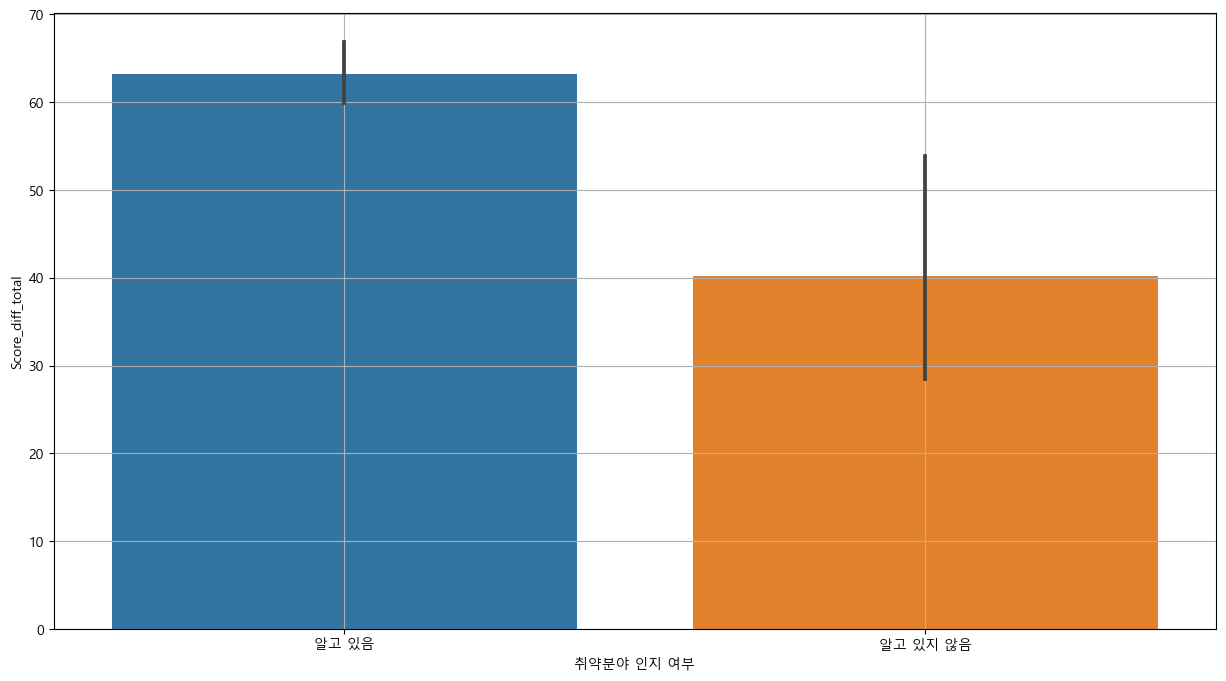

In [62]:
## 그래프 분석 : barplot

plt.figure(figsize = (15,8))
sns.barplot(x='취약분야 인지 여부', y='Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [76]:
## 범주 데이터 확인 : value_counts()

base_data['취약분야 인지 여부'].value_counts()

알고 있음       463
알고 있지 않음     39
Name: 취약분야 인지 여부, dtype: int64

In [79]:
## 평균 분석 : ttest_ind

t_yes = base_data.loc[base_data['취약분야 인지 여부']=='알고 있음', 'Score_diff_total']
t_no = base_data.loc[base_data['취약분야 인지 여부']=='알고 있지 않음', 'Score_diff_total']

spst.ttest_ind(t_yes, t_no)

Ttest_indResult(statistic=3.517543028153186, pvalue=0.0004752630589466526)

## [정리] 이변량 분석을 통해 파악된 비즈니스 인사이트는 무엇인가요?

<br><br><hr><br><br>

## <font color="orange">**4. 도전 미션** </font>


#### &nbsp;&nbsp; 4-1)  나이, 나이대 정보 추가 및 데이터 분석

  - 생년월일을 나이로 변경하여 **열(age)**을 추가하세요.
  - 나이로 변경한 열을 아래의 예시를 참고하여 연령대로 구분하여 **열(age group)**을 추가하세요.
    - 연령 구분 예시 : 20세 이하, 21세-25세, 26세-30세, 31세-35세, 36세-40세, 41세-45세, 46세-50세, 50세 이상
  - 나이, 나이대 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-1) 나이(age) 열 추가

In [15]:
# 라이브러리 불러오기
from datetime import datetime

# 현재 날짜 구하기
now = datetime.now()

# 데이터프레임에서 Birth_Year 열의 값으로부터 현재 날짜(2023년도) 기준 나이 계산 
# 'age'열에 값 추가하기
base_data['age'] = now.year - base_data['Birth_Year']

# 확인
base_data[['ID','Birth_Year', 'age']]

,ID,Birth_Year,age
0,1,1973,50
1,2,1982,41
2,3,1995,28
3,4,1987,36
4,5,1994,29
...,...,...,...
495,496,2006,17
496,497,1988,35
497,498,2006,17
498,499,1990,33


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-2) 나이(age) 단변량 분석

,count,mean,std,min,25%,50%,75%,max
age,500.0,30.094,8.224381,16.0,23.0,30.5,36.25,50.0


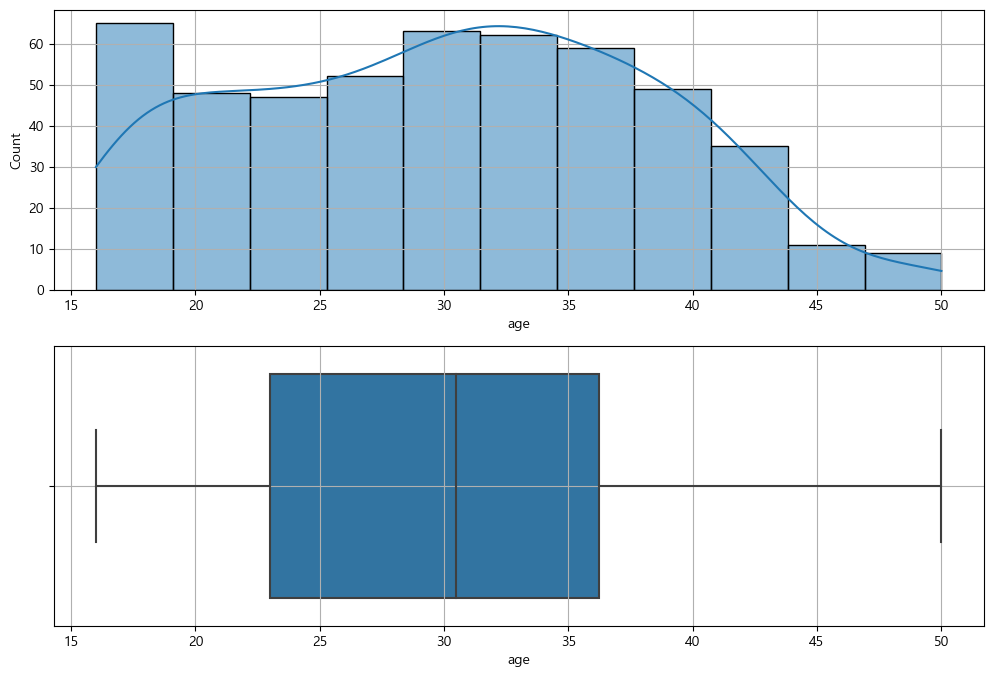

In [6]:
## age 데이터의 기초 통계량 확인

display(base_data[['age']].describe().T)

## age 데이터 분포 시각화 확인
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.histplot(x = 'age', data = base_data, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = 'age', data = base_data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-3) 나이대(age_group) 열 추가

In [10]:
## cut() 함수를 활용하여 나이 연령대 계산

## 각 나이 연령대 구간의 경계(bins) 정의
bins = [0, 20, 25, 30, 35, 40, 45, 100]

## labels: 각 구간에 붙일 라벨
labels = ['20세 이하', '21세-25세', '26세-30세', '31세-35세', '36세-40세', '41세-45세', '46세 이상']

## cut 함수 사용
base_data['age_group'] = pd.cut(base_data['age'], bins=bins, labels=labels)

## 데이터 확인
base_data

,ID,Gender,Birth_Year,3rd_LC_Score,3rd_RC_Score,3rd_Total_Score,학습목표,학습방법,강의 학습 교재 유형,학습빈도,...,토익 모의테스트 횟수,1st_LC_Score,1st_RC_Score,1st_Total_Score,2nd_LC_Score,2nd_RC_Score,2nd_Total_Score,Score_diff_total,age,age_group
0,1,M,1973,345,336,681,승진,온라인강의,영상 교재,주5-6회,...,10,181,173,354,227,213,440,241,50,46세 이상
1,2,F,1982,380,368,748,승진,온라인강의,뉴스/이슈 기반 교재,주5-6회,...,14,330,290,620,354,339,693,55,41,41세-45세
2,3,F,1995,416,382,798,자기계발,참고서,일반적인 영어 텍스트 기반 교재,주1-2회,...,4,367,309,676,396,365,761,37,28,26세-30세
3,4,M,1987,495,397,892,승진,온라인강의,뉴스/이슈 기반 교재,주3-4회,...,8,470,285,755,495,341,836,56,36,36세-40세
4,5,M,1994,398,437,835,자기계발,온라인강의,영상 교재,주3-4회,...,4,273,372,645,314,426,740,95,29,26세-30세
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,M,2006,364,336,700,자기계발,온라인강의,일반적인 영어 텍스트 기반 교재,매일(주 7회),...,13,347,315,662,349,321,670,30,17,20세 이하
496,497,F,1988,187,252,439,승진,온라인강의,비즈니스 시뮬레이션(Role Play),매일(주 7회),...,17,112,250,362,120,251,371,68,35,31세-35세
497,498,M,2006,255,167,422,자기계발,오프라인강의,일반적인 영어 텍스트 기반 교재,주1-2회,...,4,252,150,402,254,158,412,10,17,20세 이하
498,499,F,1990,422,370,792,자기계발,오프라인강의,비즈니스 시뮬레이션(Role Play),주3-4회,...,7,371,324,695,378,326,704,88,33,31세-35세


##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-4) 나이대(age_group) 단변량 분석

31세-35세    106
36세-40세     92
26세-30세     87
21세-25세     80
20세 이하      66
41세-45세     57
46세 이상      14
Name: age_group, dtype: int64
31세-35세    0.211155
36세-40세    0.183267
26세-30세    0.173307
21세-25세    0.159363
20세 이하     0.131474
41세-45세    0.113546
46세 이상     0.027888
Name: age_group, dtype: float64


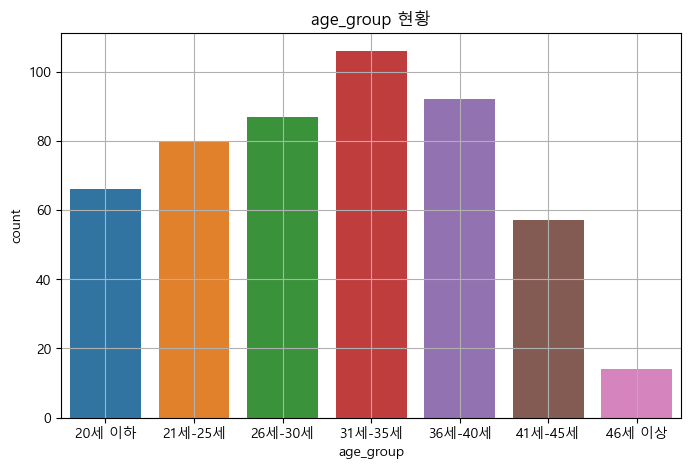

In [85]:
## 범주형 변수의 범주별 빈도수 확인하기 : value_counts()
print(base_data['age_group'].value_counts())

## 범주형 변수의 범주별 빈도 비율 확인하기 : value_counts() / df.shape[0]
print(base_data['age_group'].value_counts()/base_data.shape[0])

## age_group 기준으로 데이터 분포 시각화 확인 : countplot()
plt.figure(figsize=(8, 5))
sns.countplot(x = 'age_group', data = base_data)
plt.title('age_group 현황')
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-5) 나이(age) -> Target 이변량 분석

In [69]:
## 가설 수립
## 귀무 가설(H0) :
## 대립 가설(H1) : 

PearsonRResult(statistic=0.12562243574462767, pvalue=0.004820757354420444)


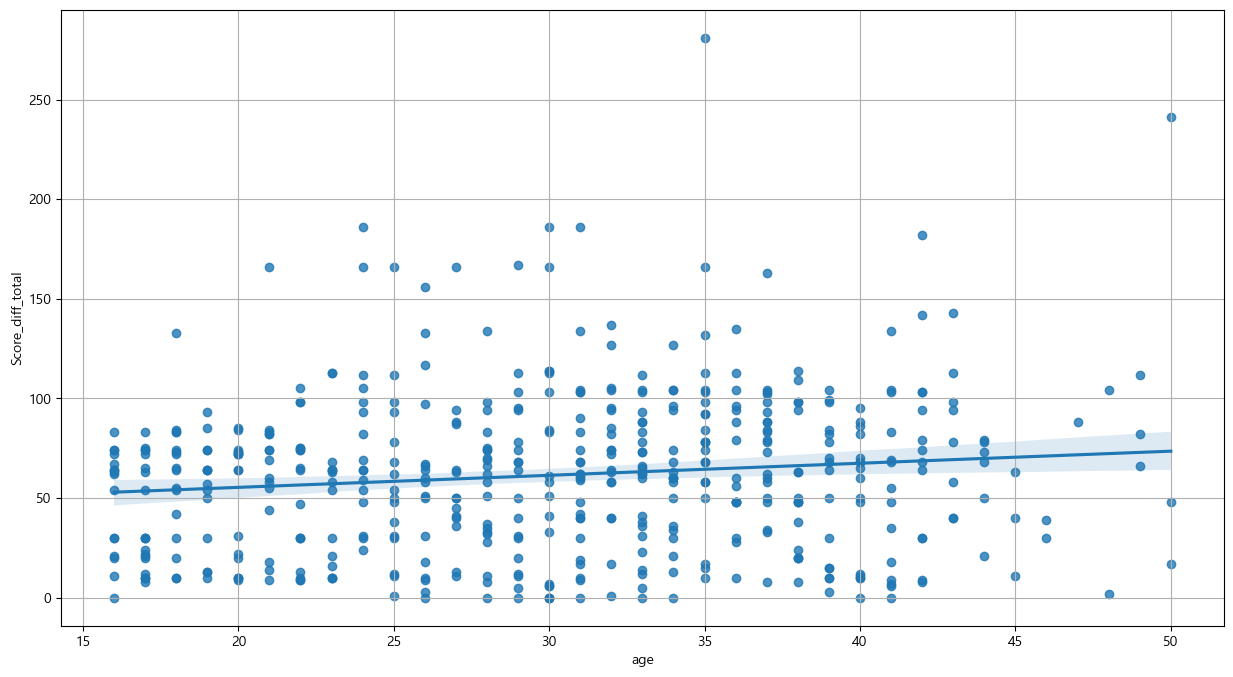

In [86]:
## 상관분석 (pearsonr)

print(spst.pearsonr(base_data['age'], base_data['Score_diff_total']))

## regplot으로 시각화
plt.figure(figsize = (15,8))
sns.regplot(x = 'age', y= 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-1-6) 나이대(age_group) -> Target 이변량 분석

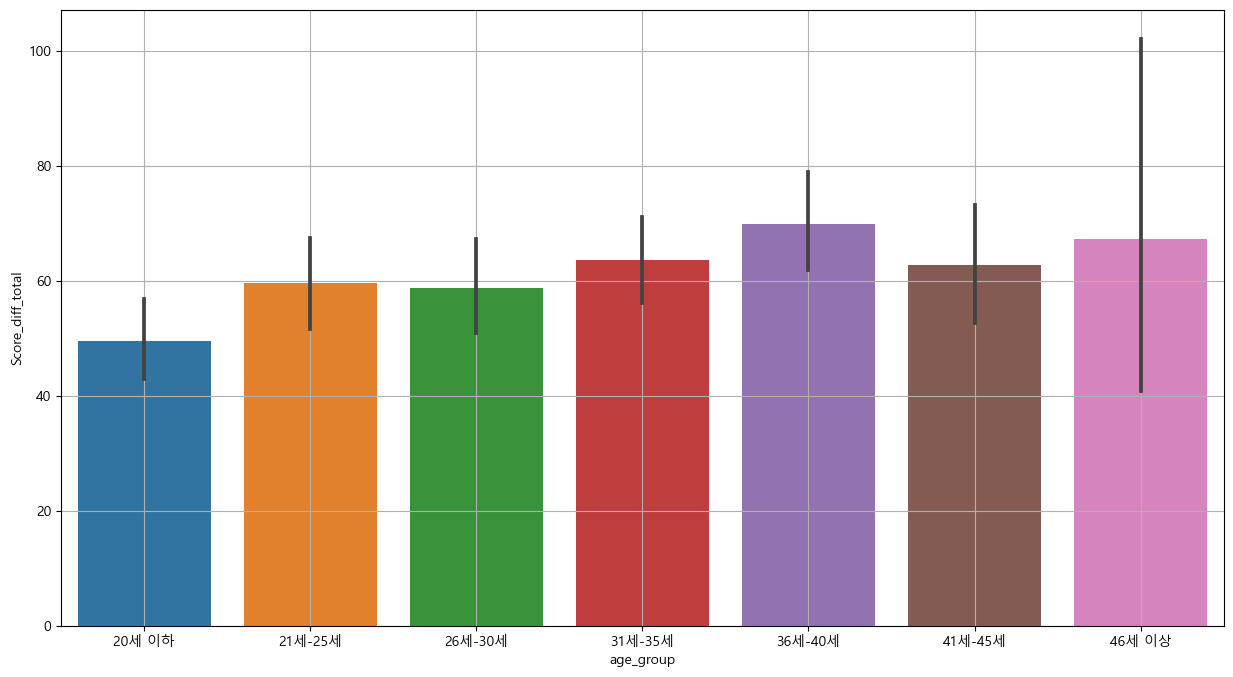

In [71]:
## barplot 시각화

plt.figure(figsize = (15,8))
sns.barplot(x='age_group', y='Score_diff_total', data = base_data)
plt.grid()
plt.show()

In [89]:
## 범주 데이터 확인

base_data['age_group'].value_counts()

31세-35세    106
36세-40세     92
26세-30세     87
21세-25세     80
20세 이하      66
41세-45세     57
46세 이상      14
Name: age_group, dtype: int64

In [90]:
## 분산 분석

anova_1 = base_data.loc[base_data['age_group']=='20세 이하', 'Score_diff_total']
anova_2 = base_data.loc[base_data['age_group']=='21세-25세', 'Score_diff_total']
anova_3 = base_data.loc[base_data['age_group']=='26세-30세', 'Score_diff_total']
anova_4 = base_data.loc[base_data['age_group']=='31세-35세', 'Score_diff_total']
anova_5 = base_data.loc[base_data['age_group']=='36세-40세', 'Score_diff_total']
anova_6 = base_data.loc[base_data['age_group']=='41세-45세', 'Score_diff_total']
anova_7 = base_data.loc[base_data['age_group']=='46세 이상', 'Score_diff_total']

spst.f_oneway(anova_1, anova_2, anova_3, anova_4, anova_5, anova_6, anova_7)

F_onewayResult(statistic=1.9236058401200313, pvalue=0.07528946861702168)

#### &nbsp;&nbsp; 4-2) 1,2회차 점수 차이 정보 추가 및 데이터 분석

* **세부요구사항**
    - 1,2회차 점수 차이 ( 2회차 점수 - 1회차 점수)를 구하여 **열(Score_diff_total_2_1)**을 추가하세요.
    - 1,2회차 점수 차이 데이터 특성에 맞는 단변량, 이변량 분석을 하세요.

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-1) 1,2회 점수 차 (Score_diff_total_2_1) 열 추가

In [91]:
base_data['Score_diff_total_2_1'] = base_data['2nd_Total_Score'] - base_data['1st_Total_Score']

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-2) Score_diff_total_2_1 단변량 분석

,count,mean,std,min,25%,50%,75%,max
Score_diff_total_2_1,502.0,49.428287,38.470169,2.0,10.0,50.0,74.0,266.0


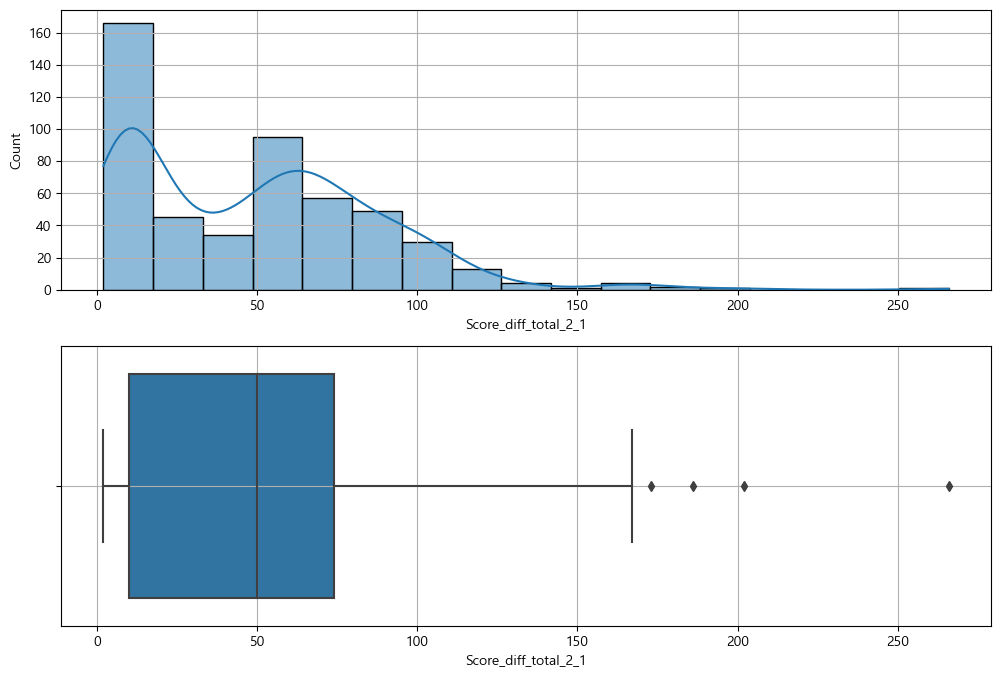

In [92]:
## Score_diff_total_2_1 데이터의 기초 통계량 확인
display(base_data[['Score_diff_total_2_1']].describe().T)


## Score_diff_total_2_1  데이터 분포 시각화 확인
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.histplot(x = 'Score_diff_total_2_1', data = base_data, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = 'Score_diff_total_2_1', data = base_data)
plt.grid()

plt.show()

##### &nbsp; &nbsp; &nbsp; &nbsp; 4-2-3) Score_diff_2_1 -> Target 이변량 분석

PearsonRResult(statistic=-0.03370708097570928, pvalue=0.451119099877319)


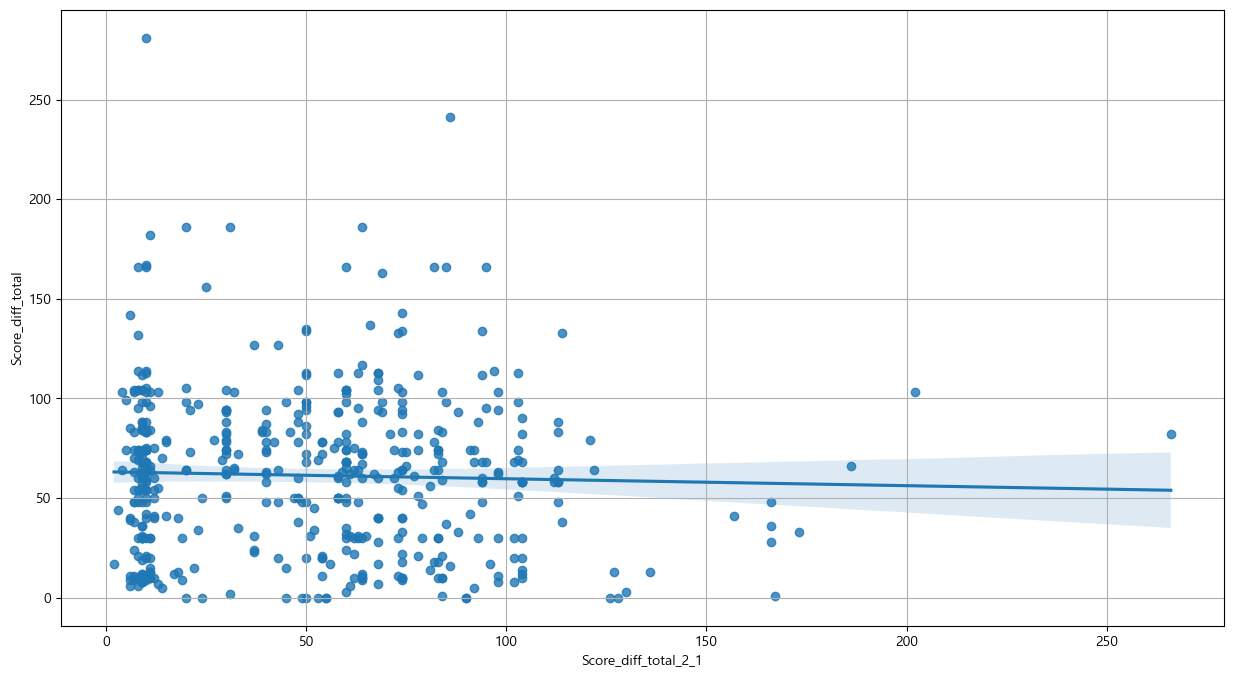

In [93]:
## 상관분석 (pearsonr)

print(spst.pearsonr(base_data['Score_diff_total_2_1'], base_data['Score_diff_total']))

## regplot으로 시각화
plt.figure(figsize = (15,8))
sns.regplot(x = 'Score_diff_total_2_1', y= 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

#### &nbsp;&nbsp; 4-3) 추가하고 싶은 정보를 생성하고, 이에 대한 단변량/이변량 분석을 수행

In [94]:
## 열(데이터) 추가
base_data['Score_diff_total_3_1'] = base_data['3rd_Total_Score'] - base_data['1st_Total_Score']

,count,mean,std,min,25%,50%,75%,max
Score_diff_total_3_1,502.0,110.886454,54.331623,12.0,74.0,108.0,145.5,348.0


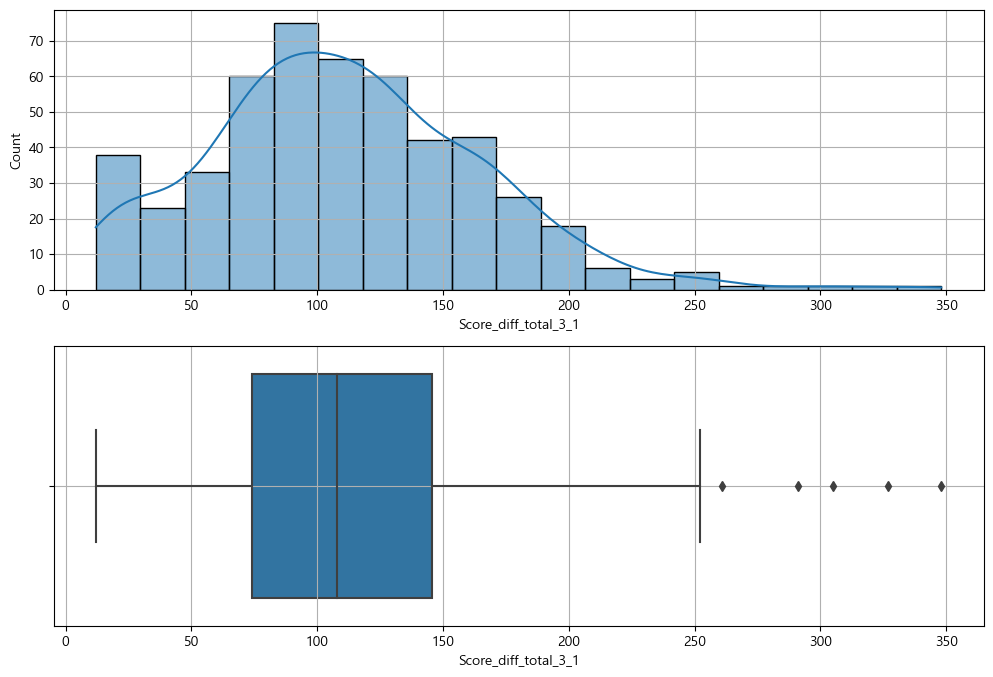

In [95]:
## 단변량 분석

## 기초 통계량 확인
display(base_data[['Score_diff_total_3_1']].describe().T)


## 데이터 분포 시각화 확인
plt.figure(figsize = (12,8))
plt.subplot(2,1,1)
sns.histplot(x = 'Score_diff_total_3_1', data = base_data, kde = True)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x = 'Score_diff_total_3_1', data = base_data)
plt.grid()

plt.show()

PearsonRResult(statistic=0.7065532608210197, pvalue=4.116358282046825e-77)


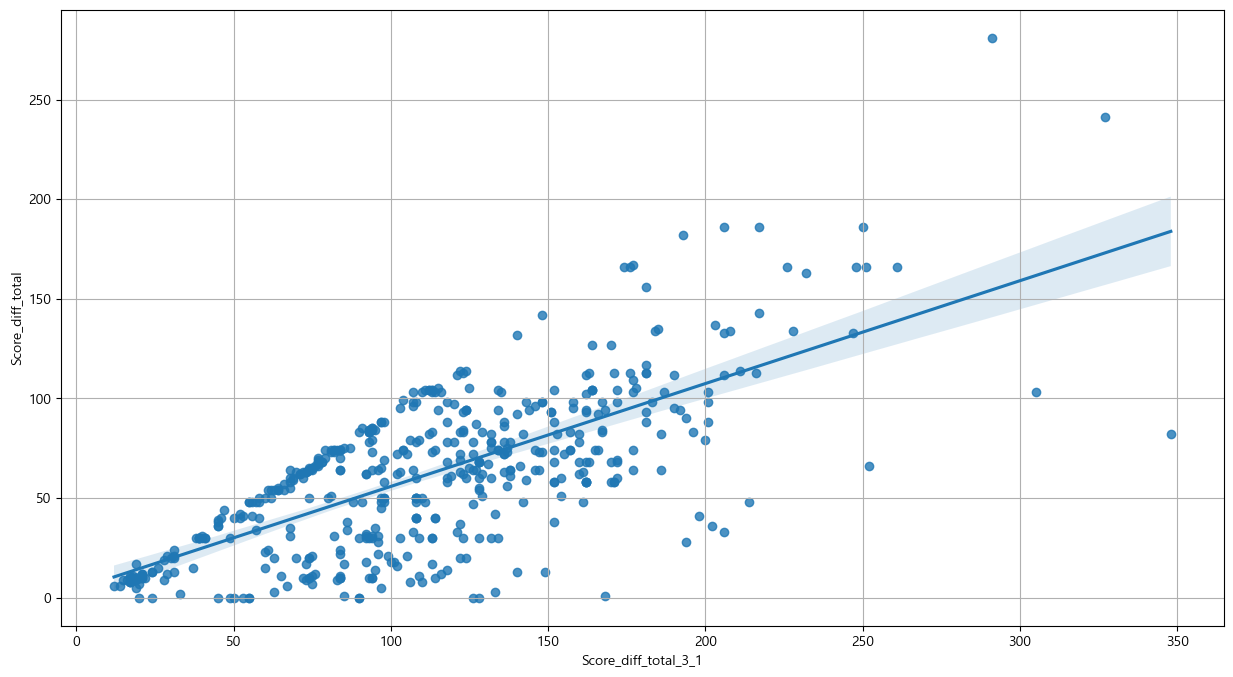

In [97]:
## 이변량 분석

## 상관분석 (pearsonr)

print(spst.pearsonr(base_data['Score_diff_total_3_1'], base_data['Score_diff_total']))

## regplot으로 시각화
plt.figure(figsize = (15,8))
sns.regplot(x = 'Score_diff_total_3_1', y= 'Score_diff_total', data = base_data)
plt.grid()
plt.show()

## [정리] 3가지 추가 feature를 통해 파악된 비즈니스 인사이트는 무엇인가요?

## <font color="green"> **Mission Clear** </font> &nbsp; &nbsp; 수고하셨습니다!!